# Visualizing data

Import the necessary library

In [1]:
import pandas as pd 
# Pandas is a powerful library for data manipulation and analysis (reading, writing, cleaning, preprocessing, data analysis (grouping, merging, and reshaping data))
import numpy as np
# NumPy is a fundamental package for scientific computing in Python. NumPy is often used for numerical computations and data analysis)
import matplotlib.pyplot as plt
# Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python.
import seaborn as sb
# Seaborn is a statistical data visualization library based on Matplotlib. It simplifies the creation of complex visualizations (heatmaps, violin plots, pair plots)

Reading our CSV file 

In [2]:
df = pd.read_csv('flow.csv')
df.head()

C:\Users\HF\AppData\Local\Temp\ipykernel_8456\3613370282.py:1: DtypeWarning: Columns (3,5,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow.csv')


,Timestamp,Datapath_id,Ip_src,Mac_src,Ip_dst,Mac_dst,Arp,Arp_code,Ip_protocole,Port_src,...,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Hard_timeout,Idle_timeout,Attack,Attack_type
0,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
1,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
2,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
3,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
4,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN


In [3]:
df.shape

(1864563, 44)

In [4]:
df.columns

Index(['Timestamp', 'Datapath_id', 'Ip_src', 'Mac_src', 'Ip_dst', 'Mac_dst',
       'Arp', 'Arp_code', 'Ip_protocole', 'Port_src', 'Port_dst', 'Icmp',
       'Icmp_code', 'Icmp_type', 'Tcp', 'Tcp_flags', 'NS', 'WCR', 'ECE', 'URG',
       'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'SSL', 'SSH', 'Ftp', 'Udp',
       'Dns', 'Dhcp', 'Flow_duration', 'Flow_dur_nsec', 'Packet_count',
       'Pkt_per_sec', 'Pkt_per_nsec', 'Bytes', 'Bytes_per_sec',
       'Bytes_per_nsec', 'Hard_timeout', 'Idle_timeout', 'Attack',
       'Attack_type'],
      dtype='object')

Drop unnecessary columns and rows.

We just need tpo keep Attack data. And so we drop normal traffic data.
After that we do not need the column Attack anymore, just attack type to classify the different attacks.

In [5]:
df = df[df['Attack']==1]
df=df.reset_index(drop=True)
df

,Timestamp,Datapath_id,Ip_src,Mac_src,Ip_dst,Mac_dst,Arp,Arp_code,Ip_protocole,Port_src,...,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Hard_timeout,Idle_timeout,Attack,Attack_type
0,1.711896e+09,1,192.168.190.254,NaN,192.168.190.135,NaN,0,NaN,17.0,67.0,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,120,60,1,udp flood
1,1.711896e+09,1,192.168.190.254,NaN,192.168.190.135,NaN,0,NaN,17.0,67.0,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,120,60,1,udp flood
2,1.711896e+09,1,192.168.190.254,NaN,192.168.190.135,NaN,0,NaN,17.0,67.0,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,120,60,1,udp flood
3,1.711896e+09,1,192.168.190.254,NaN,192.168.190.135,NaN,0,NaN,17.0,67.0,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,120,60,1,udp flood
4,1.711896e+09,1,192.168.190.254,NaN,192.168.190.135,NaN,0,NaN,17.0,67.0,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,120,60,1,udp flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,1.711900e+09,5,10.0.0.4,NaN,10.0.0.8,NaN,0,NaN,6.0,80.0,...,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,120,60,1,slowloris
1584287,1.711900e+09,5,10.0.0.4,NaN,10.0.0.8,NaN,0,NaN,6.0,80.0,...,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,120,60,1,slowloris
1584288,1.711900e+09,5,10.0.0.4,NaN,10.0.0.8,NaN,0,NaN,6.0,80.0,...,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,120,60,1,slowloris
1584289,1.711900e+09,5,10.0.0.4,NaN,10.0.0.8,NaN,0,NaN,6.0,80.0,...,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,120,60,1,slowloris


In [6]:
df = df.drop(columns=['Timestamp', 'Datapath_id', 'Ip_src', 'Ip_dst', 'Mac_src', 'Mac_dst',
                        'Ip_protocole', 'Port_src','Tcp_flags','NS','WCR','ECE','URG','SSL','SSH','Flow_dur_nsec','Pkt_per_nsec','Bytes_per_nsec', 'Hard_timeout', 'Idle_timeout','Attack'])
df

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Ftp,Udp,Dns,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack_type
0,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,3,0,0.000000,0,0.000000,udp flood
1,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,13,0,0.000000,0,0.000000,udp flood
2,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,23,0,0.000000,0,0.000000,udp flood
3,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,33,0,0.000000,0,0.000000,udp flood
4,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,43,0,0.000000,0,0.000000,udp flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432,slowloris
1584287,0,NaN,60460.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973,slowloris
1584288,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000,slowloris
1584289,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757,slowloris


# Missing value analysis

The number of null values for each column.

In [7]:
number_null_value=df.isnull().sum()
number_null_value

Arp                    0
Arp_code         1584097
Port_dst          323220
Icmp                 194
Icmp_code        1261265
Icmp_type        1261265
Tcp                  194
ACK               633452
PSH               633452
RST               633452
SYN               633452
FIN               633452
Http                 194
Ftp                  194
Udp                  194
Dns                  194
Dhcp                 194
Flow_duration          0
Packet_count           0
Pkt_per_sec            0
Bytes                  0
Bytes_per_sec          0
Attack_type            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584291 entries, 0 to 1584290
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Arp            1584291 non-null  int64  
 1   Arp_code       194 non-null      float64
 2   Port_dst       1261071 non-null  float64
 3   Icmp           1584097 non-null  float64
 4   Icmp_code      323026 non-null   float64
 5   Icmp_type      323026 non-null   float64
 6   Tcp            1584097 non-null  float64
 7   ACK            950839 non-null   float64
 8   PSH            950839 non-null   float64
 9   RST            950839 non-null   float64
 10  SYN            950839 non-null   float64
 11  FIN            950839 non-null   float64
 12  Http           1584097 non-null  float64
 13  Ftp            1584097 non-null  float64
 14  Udp            1584097 non-null  float64
 15  Dns            1584097 non-null  float64
 16  Dhcp           1584097 non-null  float64
 17  Flow_dur

Arp_code, Icmp_code, Icmp_type were replaced with -1 instead of 0 because for each one 0 is a reserved flag.

In [9]:
df[['Arp_code','Icmp_code','Icmp_type']] = df[['Arp_code','Icmp_code','Icmp_type']].fillna(-1).copy()
df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']] = df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']].fillna(0).copy()

# Correlation Analysis

<Axes: >

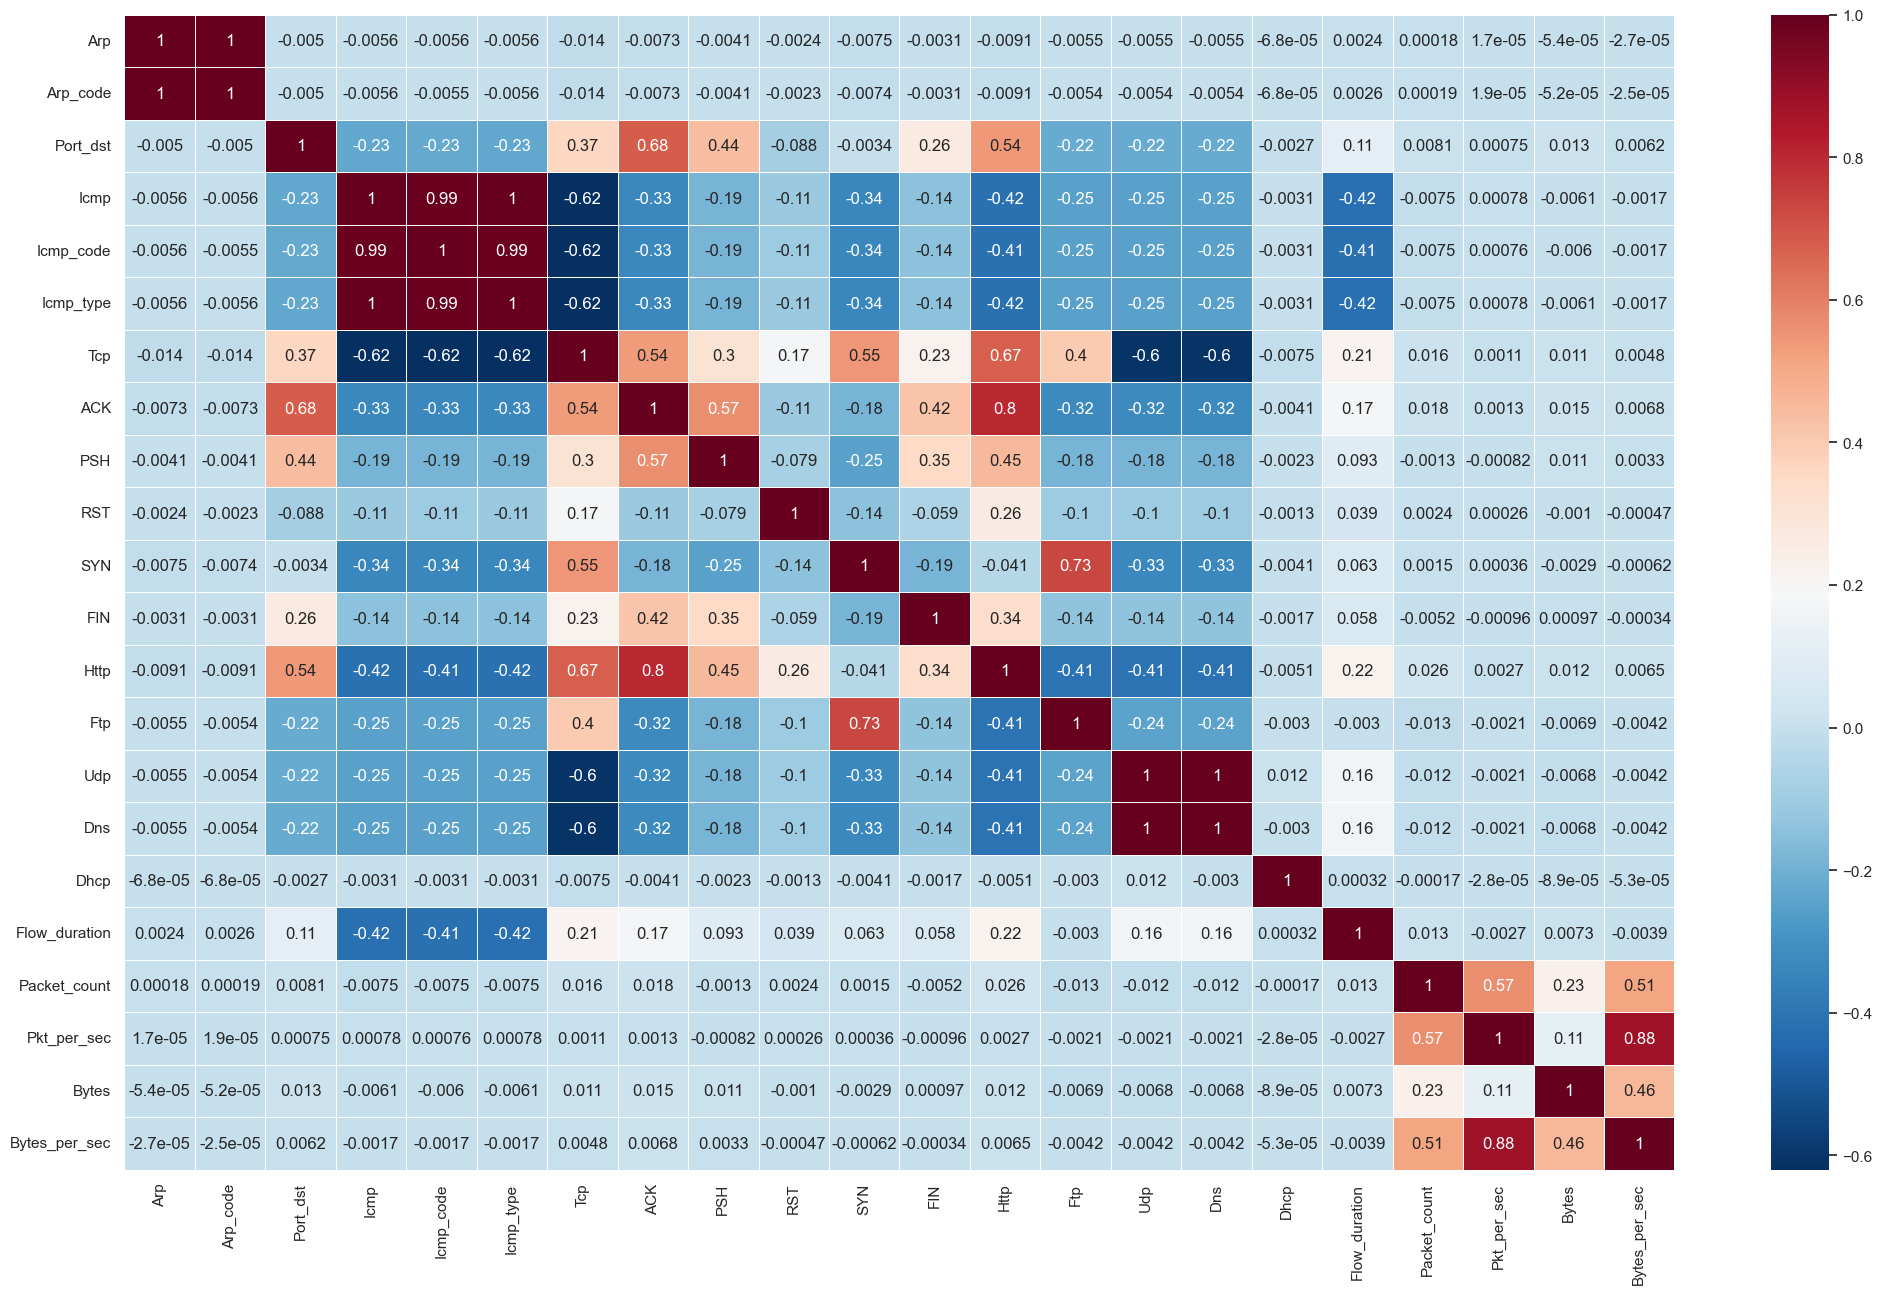

In [10]:
matrix_corr_pearson = df.drop(columns=['Attack_type'], axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(25,15)})
sb.heatmap(matrix_corr_pearson,
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

We notice a high correlation between Arp and Arp_code; Icmp, Icmp_code and Icmp_type and lastly between Udp and Dns. So we dropped the following:

In [11]:
columnsdrop=['Dns','Icmp','Icmp_code','Arp']
df=df.drop(columns=columnsdrop,axis=1)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack_type
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0,0.000000,0,0.000000,udp flood
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13,0,0.000000,0,0.000000,udp flood
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23,0,0.000000,0,0.000000,udp flood
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33,0,0.000000,0,0.000000,udp flood
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,43,0,0.000000,0,0.000000,udp flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432,slowloris
1584287,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973,slowloris
1584288,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000,slowloris
1584289,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757,slowloris


# Feature Enginneering

In [12]:
df.dtypes

Arp_code         float64
Port_dst         float64
Icmp_type        float64
Tcp              float64
ACK              float64
PSH              float64
RST              float64
SYN              float64
FIN              float64
Http             float64
Ftp              float64
Udp              float64
Dhcp             float64
Flow_duration      int64
Packet_count       int64
Pkt_per_sec      float64
Bytes              int64
Bytes_per_sec    float64
Attack_type       object
dtype: object

In [13]:
print(len(df['Attack_type'].unique()))

5


We plot our attack data distribution.

['udp flood' 'icmp flood' 'SYN flood' 'http flood' 'slowloris']


C:\Users\HF\AppData\Local\Temp\ipykernel_8456\1043492843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p=sb.countplot(x='Attack_type', data=df, palette=colors)


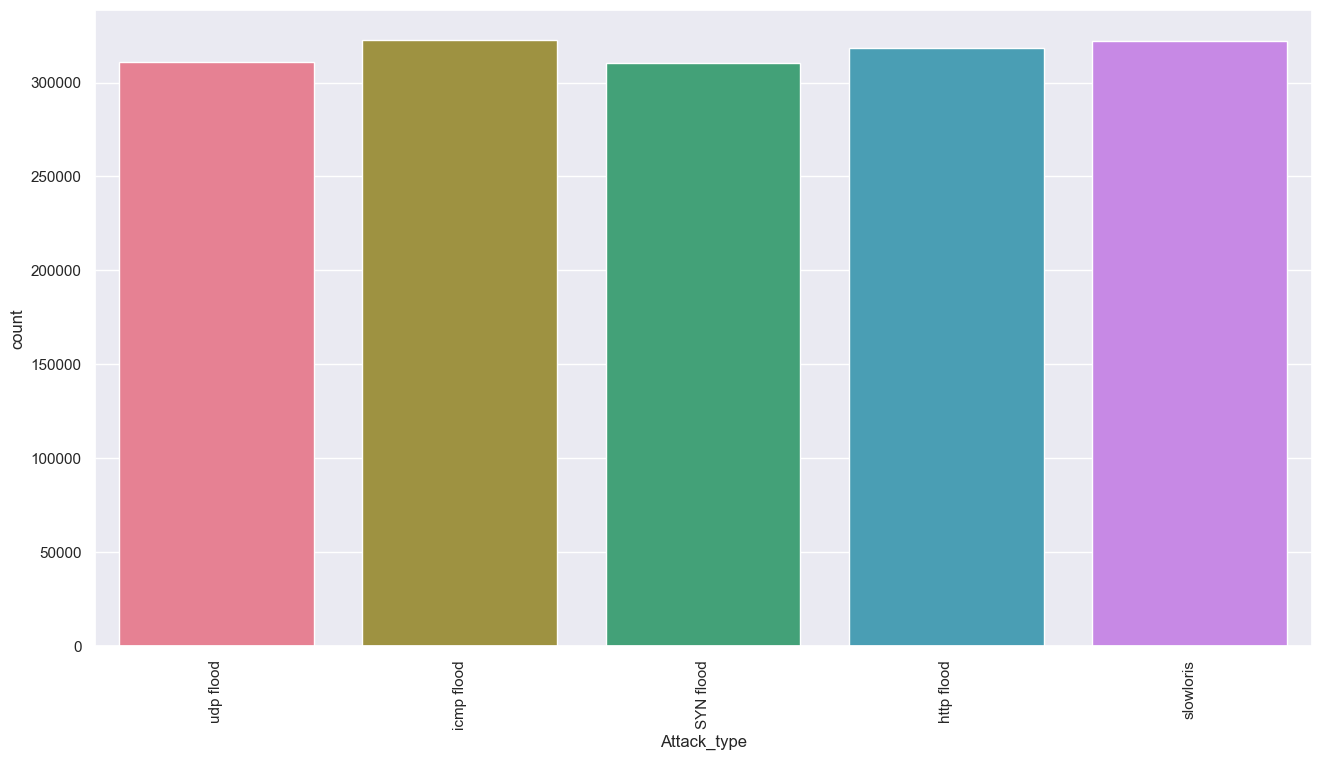

In [14]:
print(df['Attack_type'].unique())
sb.set(rc={'figure.figsize':(15.7,8.27)})
#Plot Bar chart to understand event total of device
colors = sb.color_palette("husl", len(df['Attack_type'].unique()))
p=sb.countplot(x='Attack_type', data=df, palette=colors)
_ = plt.setp(p.get_xticklabels(), rotation=90)

## Class Encoding

In [15]:
from sklearn import preprocessing
def label_encoder(colum):
    le = preprocessing.LabelEncoder()
    le.fit(colum)
    print(list(le.classes_))
    return le.transform(colum)

In [16]:
def data_pre(df):
    liste=["Attack_type"]
    for i in liste:
      df[i]=label_encoder(df[i])

In [17]:
data_pre(df)

['SYN flood', 'http flood', 'icmp flood', 'slowloris', 'udp flood']


## Handle Imbalanced Dataset Of Multiclass

Class=4, n=310649 (19.608%)
Class=2, n=322680 (20.367%)
Class=0, n=310612 (19.606%)
Class=1, n=318507 (20.104%)
Class=3, n=321843 (20.315%)


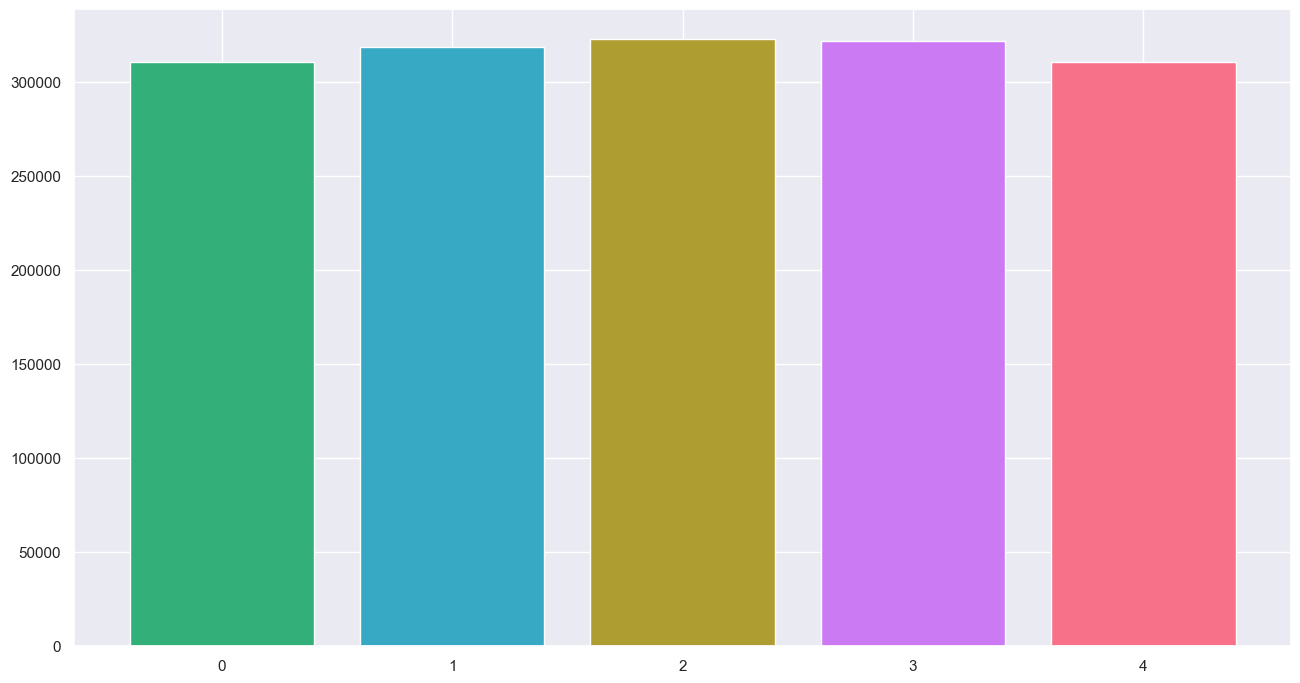

In [18]:
from collections import Counter

# Separate features (X) and label (y)
X = df.drop('Attack_type', axis=1)
y = df['Attack_type']

# Count occurences of each class in y
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# Bar graph of each class
plt.bar(counter.keys(), counter.values(), color=colors)
plt.show()

Here we have imbalanced dataset of multiclass.

We will handle imblanced dataset used **SMOTE**

Class=4, n=322680 (20.000%)
Class=2, n=322680 (20.000%)
Class=0, n=322680 (20.000%)
Class=1, n=322680 (20.000%)
Class=3, n=322680 (20.000%)


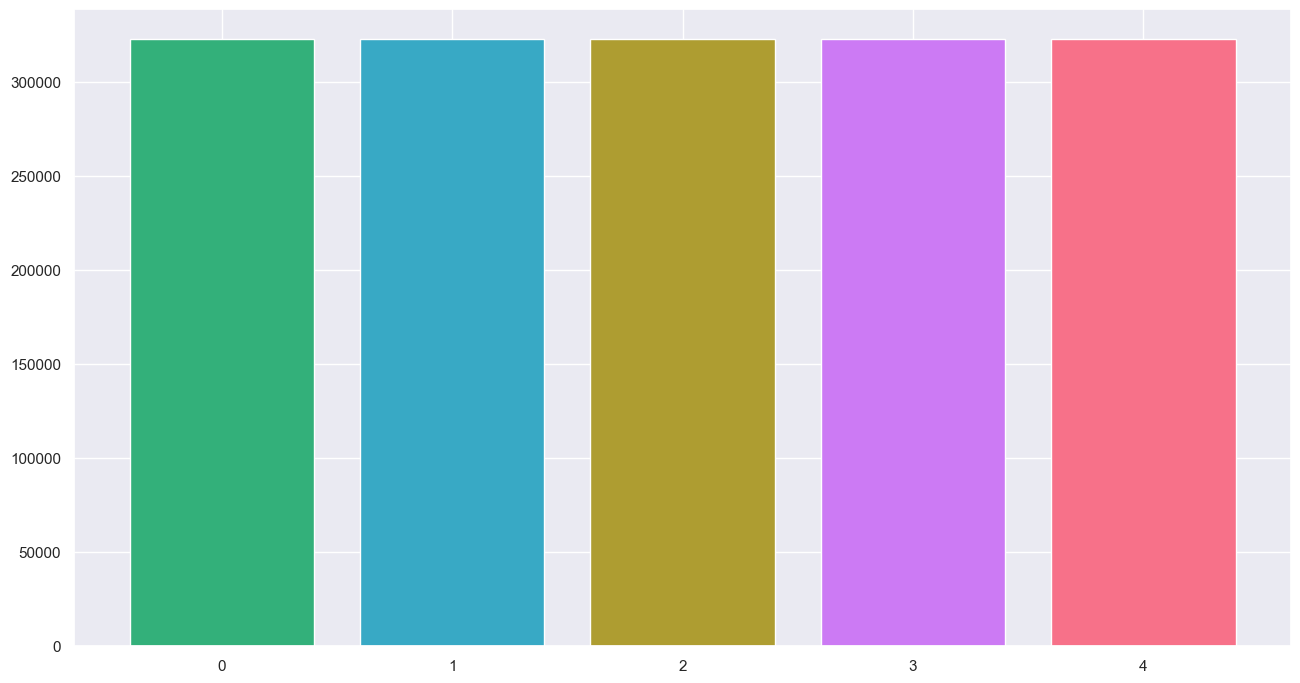

In [19]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values(), color=colors)
plt.show()

# Dataset Separation


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1290720, 18)
y_train.shape:  (1290720,)
X_test.shape:  (322680, 18)
y_test.shape:  (322680,)


In [21]:
X_train

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec
635331,-1.0,21.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,0,0.000000,0,0.000000
1121543,-1.0,80.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,53,1,0.018868,54,1.018868
469944,-1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0.000000,0,0.000000
49148,-1.0,53.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,0,0.000000,0,0.000000
1446571,-1.0,58456.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51,3,0.058824,222,4.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-1.0,53.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43,0,0.000000,0,0.000000
1414414,-1.0,80.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0,0.000000,0,0.000000
131932,-1.0,53.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34,0,0.000000,0,0.000000
671155,-1.0,21.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15,0,0.000000,0,0.000000


## Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num=['Port_dst','Packet_count','Pkt_per_sec','Bytes', 'Bytes_per_sec']
scaler.fit(X_train[num])
X_train[num] = scaler.transform(X_train[num])
X[num] = scaler.transform(X[num])
X_test[num] = scaler.transform(X_test[num])

## Number Of Event In Training-set & Test-set

In [23]:
unique, countTR = np.unique(y_train, return_counts=True)
dict(zip(unique, countTR))

{0: 257714, 1: 258058, 2: 258382, 3: 258000, 4: 258566}

In [24]:
unique, countTE = np.unique(y_test, return_counts=True)
dict(zip(unique, countTE))

{0: 64966, 1: 64622, 2: 64298, 3: 64680, 4: 64114}

# Classification

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

Calculate MAE, MSE, RMSE

In [26]:
def metrics_error(y_true,y_pred):
    print('accuracy : '+str(metrics.accuracy_score(y_true, y_pred)))
    print('mean absolute error : '+str(metrics.mean_absolute_error(y_true, y_pred)))
    print('mean squared error : '+str(metrics.mean_squared_error(y_true, y_pred)))
    print('root mean squared error : '+str(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

Confusion Matrix

In [27]:
def confixion_metrix(y_test, yy_predict, outcome_labels):
    sb.heatmap(
        metrics.confusion_matrix(y_test, yy_predict),
        annot=True,
        fmt="d",
        xticklabels=outcome_labels,
        yticklabels=outcome_labels
    )
    plt.show()

Receiver Operating Characteristic (ROC) and Area Under Curve (AUC)

In [28]:
from sklearn.metrics import roc_curve, auc
target=[ 'SYN flood', 'http flood', 'icmp flood', 'slowloris', 'udp flood']
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Graph AUC ROC CURVE ')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], target[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sb.despine()
    plt.show()

## DecisionTree Classifier

____________Decision Tree Classifier____________
____________Train Decision Tree Classifier____________
accuracy : 0.9600525288211231
mean absolute error : 0.0798988161646213
mean squared error : 0.15985728895500187
root mean squared error : 0.39982157139779473


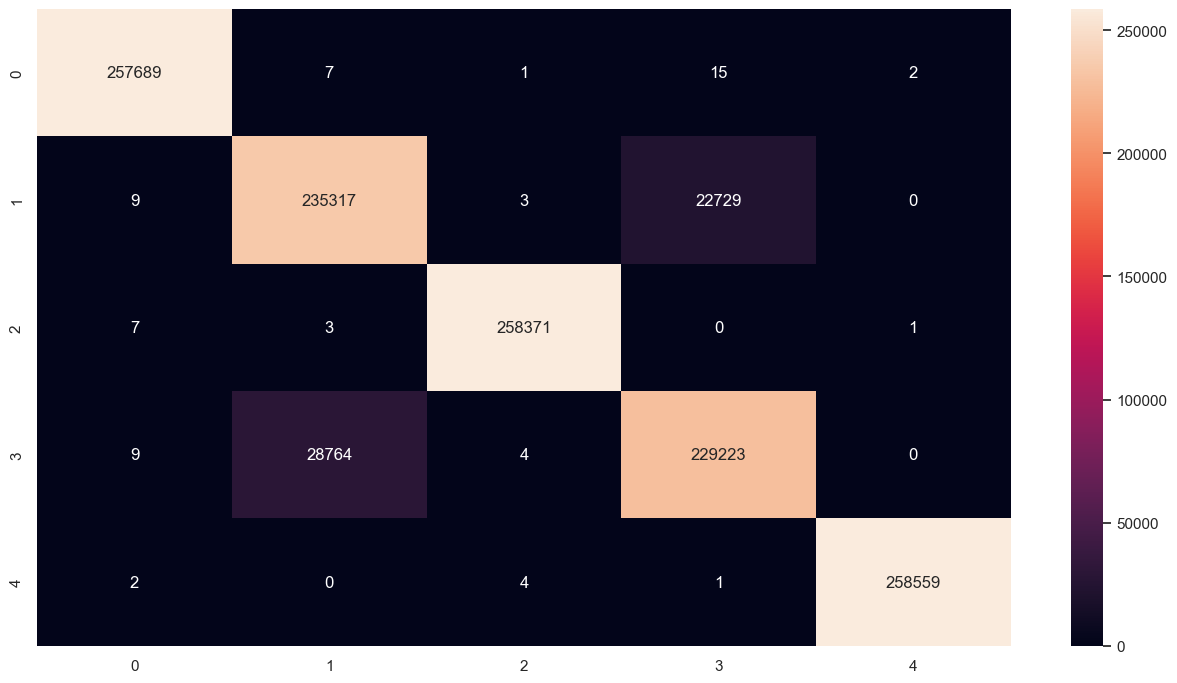

Classification report Training
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00    257714
  http flood       0.89      0.91      0.90    258058
  icmp flood       1.00      1.00      1.00    258382
   slowloris       0.91      0.89      0.90    258000
   udp flood       1.00      1.00      1.00    258566

    accuracy                           0.96   1290720
   macro avg       0.96      0.96      0.96   1290720
weighted avg       0.96      0.96      0.96   1290720



In [29]:
outcome_labels = sorted(unique)
print('____________Decision Tree Classifier____________')
Decision_Tree_Classifier=DecisionTreeClassifier(random_state=42)
Decision_Tree_Classifier.fit(X_train,y_train)
y_predict_Decision_Tree_Classifier=Decision_Tree_Classifier.predict(X_test)
y_predict_train_Decision_Tree_Classifier=Decision_Tree_Classifier.predict(X_train)
print('____________Train Decision Tree Classifier____________')
metrics_error(y_train,y_predict_train_Decision_Tree_Classifier)
cm = metrics.confusion_matrix(y_train, y_predict_train_Decision_Tree_Classifier)
confixion_metrix(y_train,y_predict_train_Decision_Tree_Classifier, outcome_labels)
print('Classification report Training')
print(classification_report(y_train,y_predict_train_Decision_Tree_Classifier, target_names=target))

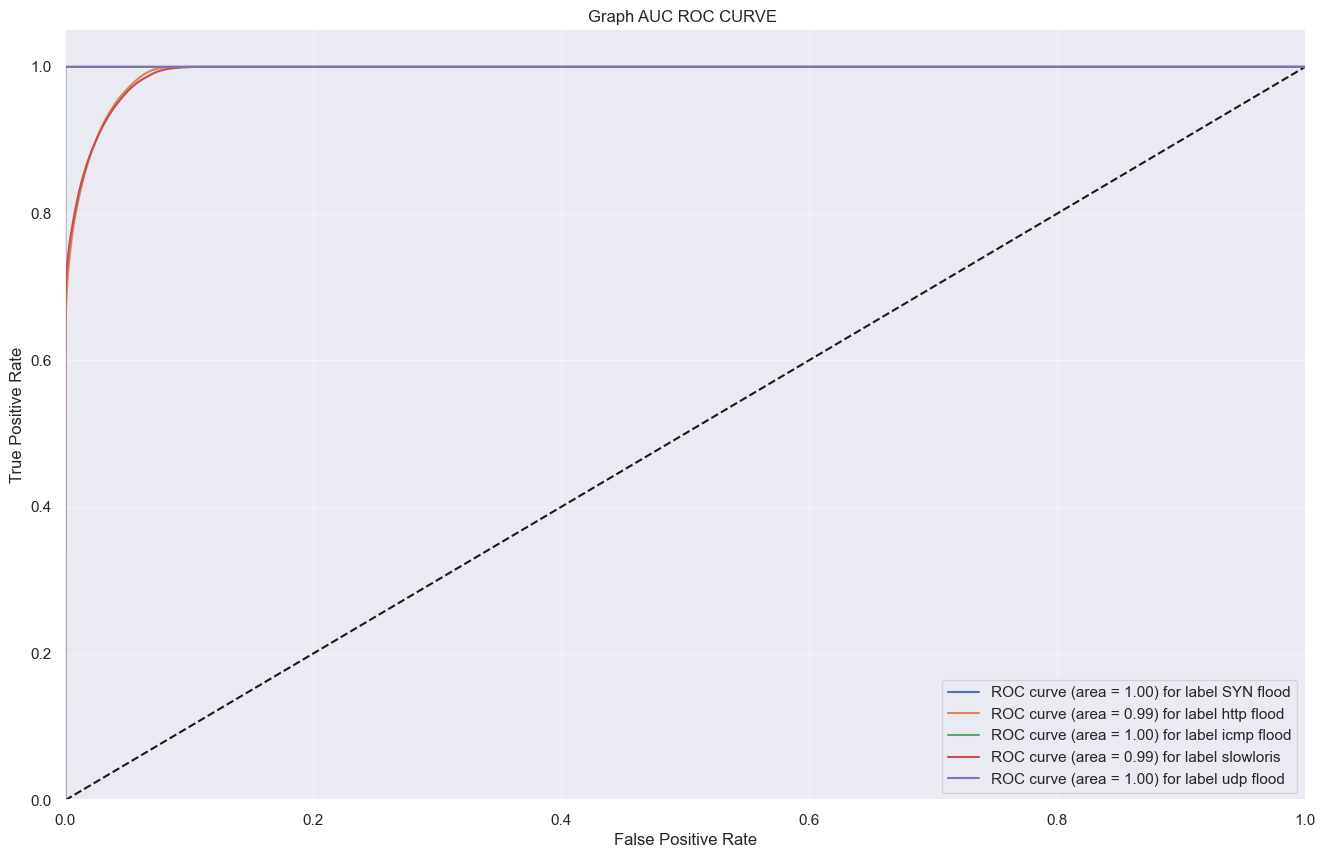

In [30]:
plot_multiclass_roc(Decision_Tree_Classifier, X_train, y_train, n_classes=5, figsize=(16, 10))

____________Test Decision Tree Classifier____________
accuracy : 0.9569728523614727
mean absolute error : 0.08606669145903062
mean squared error : 0.17223875046485682
root mean squared error : 0.41501656649446755


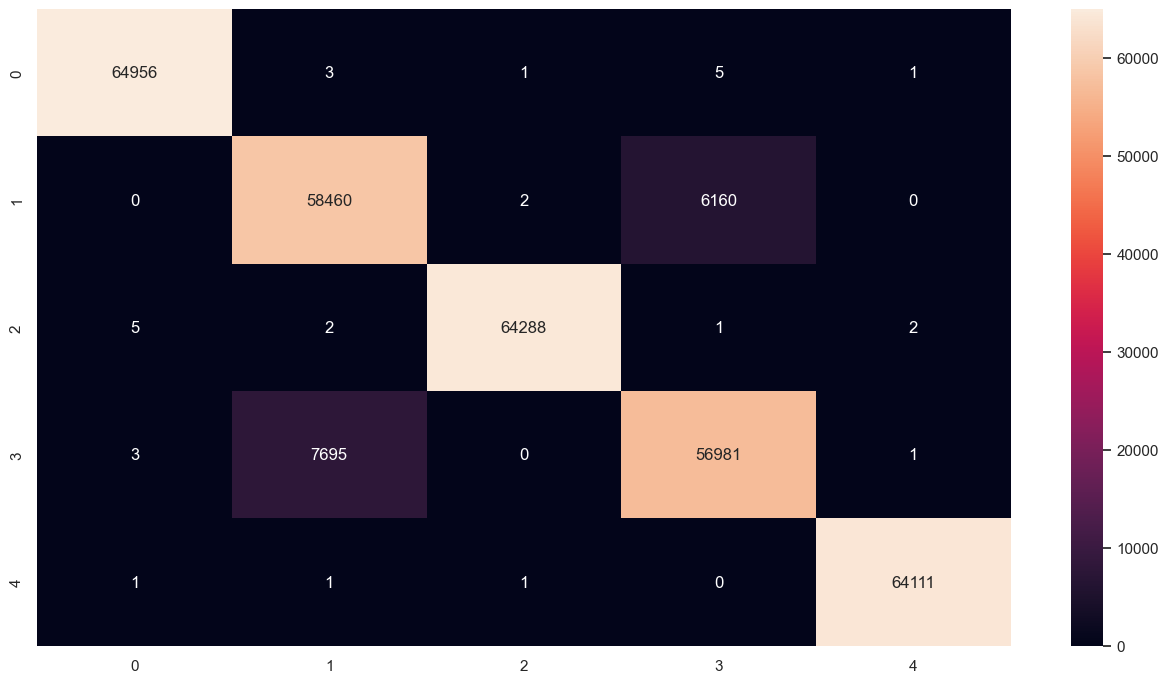

Classification report Test
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00     64966
  http flood       0.88      0.90      0.89     64622
  icmp flood       1.00      1.00      1.00     64298
   slowloris       0.90      0.88      0.89     64680
   udp flood       1.00      1.00      1.00     64114

    accuracy                           0.96    322680
   macro avg       0.96      0.96      0.96    322680
weighted avg       0.96      0.96      0.96    322680



In [31]:
print('____________Test Decision Tree Classifier____________')
metrics_error(y_test,y_predict_Decision_Tree_Classifier)
confixion_metrix(y_test, y_predict_Decision_Tree_Classifier, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_Decision_Tree_Classifier, target_names=target))

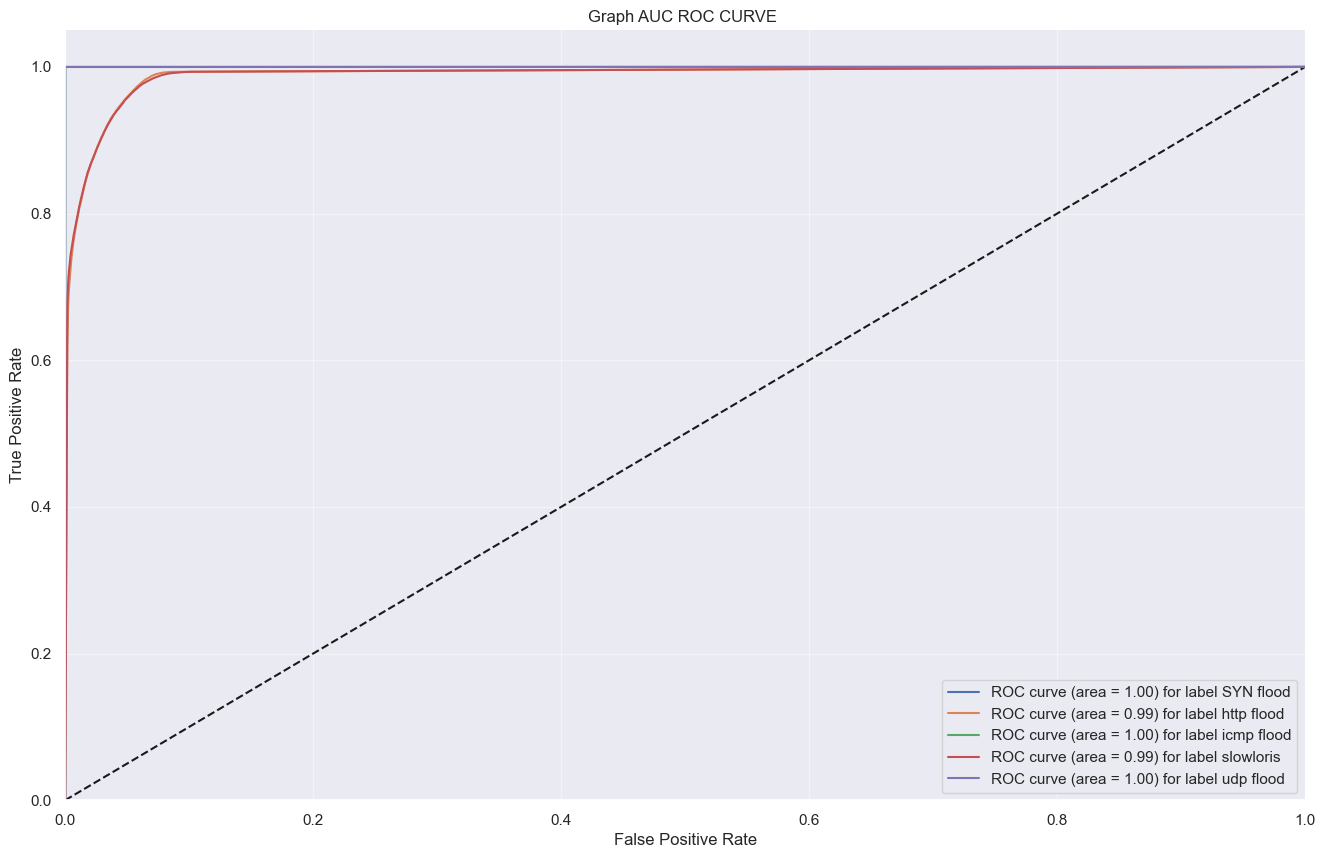

In [32]:
plot_multiclass_roc(Decision_Tree_Classifier, X_test, y_test, n_classes=5, figsize=(16, 10))

## Logistic Regression

____________LogisticRegression____________


C:\Users\HF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


____________Train Logistic Regression____________
accuracy : 0.85574485558448
mean absolute error : 0.2884723255237387
mean squared error : 0.5770585409693815
root mean squared error : 0.7596436934309279


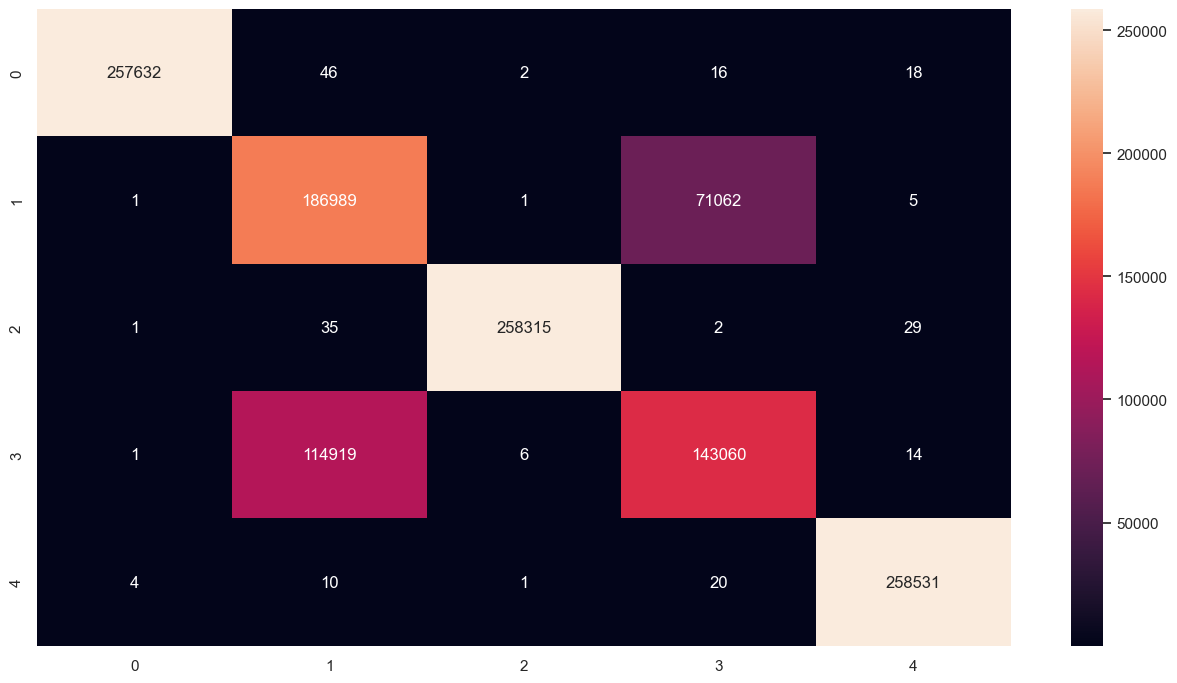

Classification report Training
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00    257714
  http flood       0.62      0.72      0.67    258058
  icmp flood       1.00      1.00      1.00    258382
   slowloris       0.67      0.55      0.61    258000
   udp flood       1.00      1.00      1.00    258566

    accuracy                           0.86   1290720
   macro avg       0.86      0.86      0.85   1290720
weighted avg       0.86      0.86      0.85   1290720



In [33]:
print('____________LogisticRegression____________')
lgg = LogisticRegression(max_iter=500,random_state=42)
lgg.fit(X_train,y_train)
y_predict=lgg.predict(X_test)
y_predict_train=lgg.predict(X_train)
print('____________Train Logistic Regression____________')
metrics_error(y_train,y_predict_train)
cm = metrics.confusion_matrix(y_train, y_predict_train)
confixion_metrix(y_train, y_predict_train, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train, target_names=target))

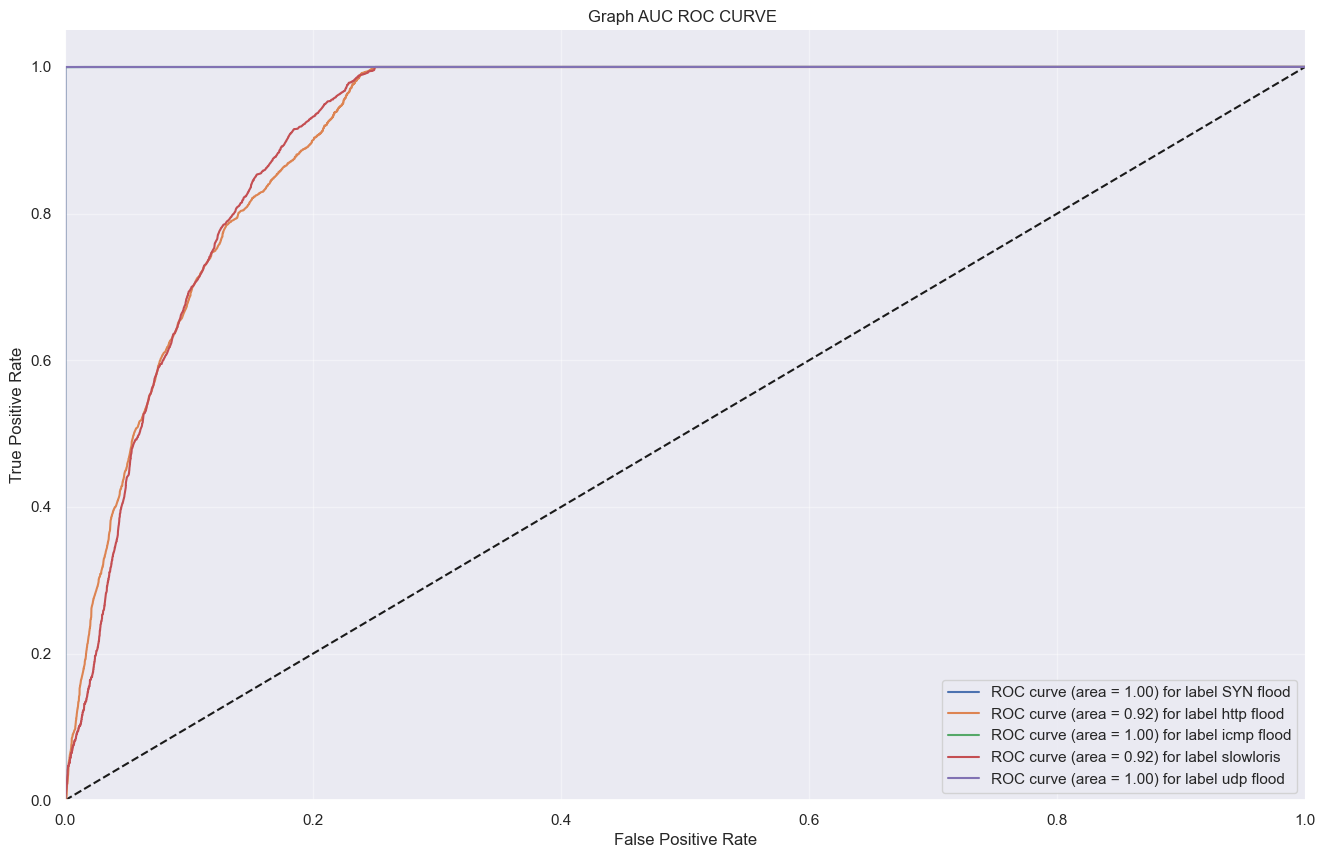

In [34]:
plot_multiclass_roc(lgg, X_train, y_train, n_classes=5, figsize=(16, 10))

____________Test Logistic Regression____________
accuracy : 0.8558355026651792
mean absolute error : 0.28828250898723196
mean squared error : 0.5766300979298377
root mean squared error : 0.759361638437074


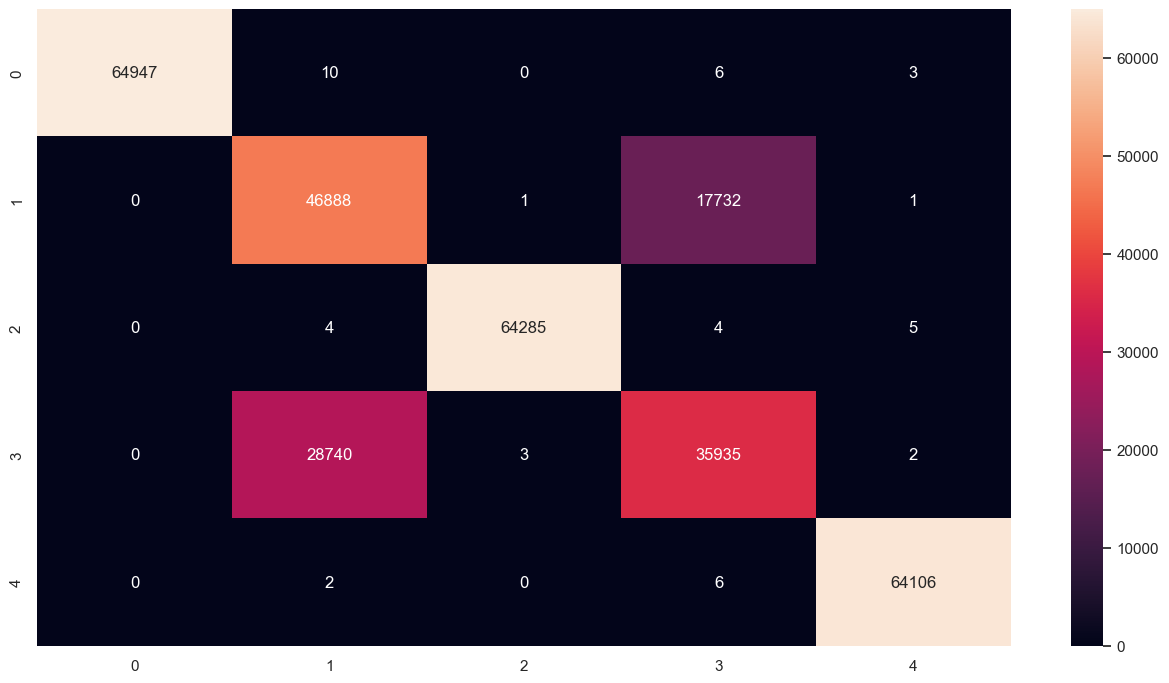

Classification report Test
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00     64966
  http flood       0.62      0.73      0.67     64622
  icmp flood       1.00      1.00      1.00     64298
   slowloris       0.67      0.56      0.61     64680
   udp flood       1.00      1.00      1.00     64114

    accuracy                           0.86    322680
   macro avg       0.86      0.86      0.86    322680
weighted avg       0.86      0.86      0.85    322680



In [35]:
print('____________Test Logistic Regression____________')
metrics_error(y_test,y_predict)
cm = metrics.confusion_matrix(y_test, y_predict)
confixion_metrix(y_test, y_predict, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict, target_names=target))

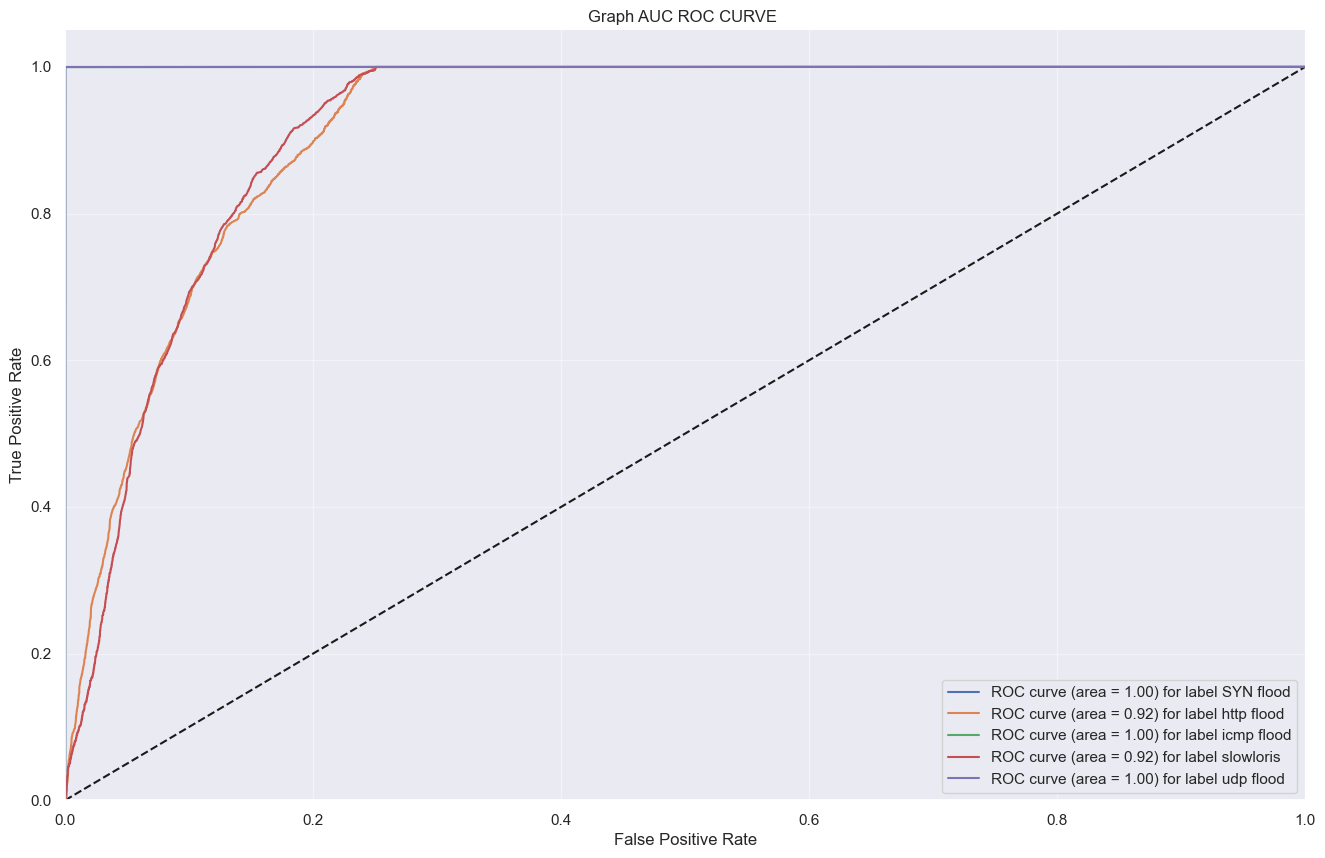

In [36]:
plot_multiclass_roc(lgg, X_test, y_test, n_classes=5, figsize=(16, 10))

## Random Forest

____________Random Forest____________
____________Train Random Forest____________
accuracy : 0.9600494297756291
mean absolute error : 0.0798980414032478
mean squared error : 0.15983482087517045
root mean squared error : 0.3997934727770958


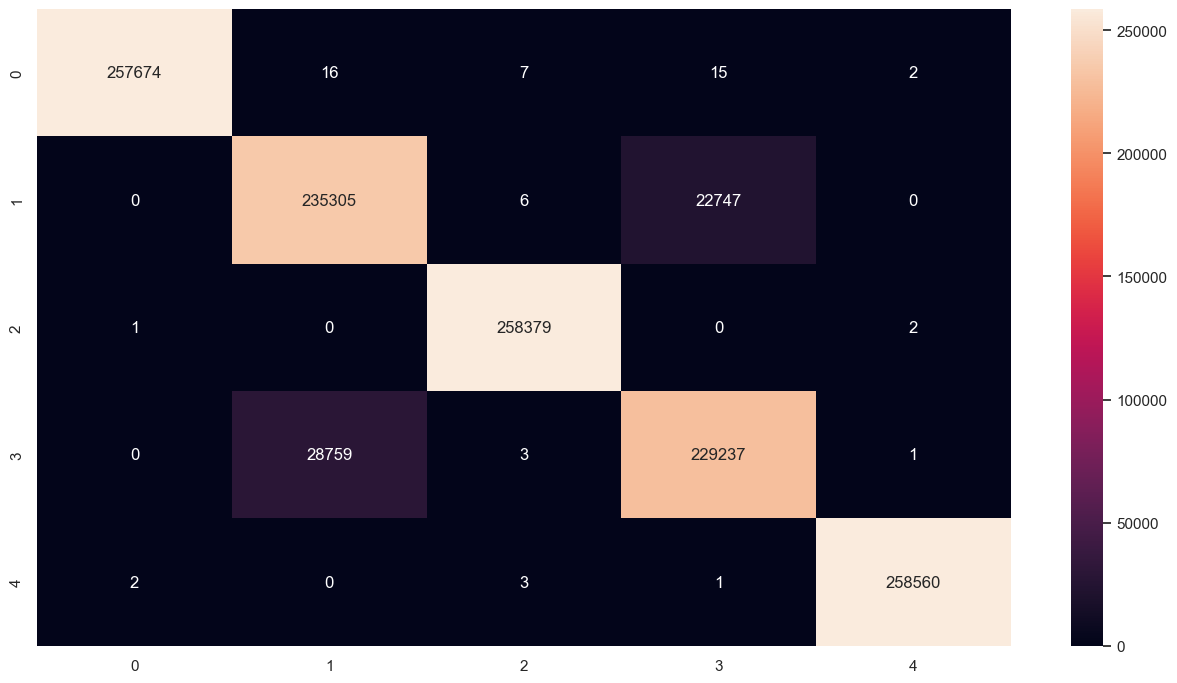

Classification report Training
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00    257714
  http flood       0.89      0.91      0.90    258058
  icmp flood       1.00      1.00      1.00    258382
   slowloris       0.91      0.89      0.90    258000
   udp flood       1.00      1.00      1.00    258566

    accuracy                           0.96   1290720
   macro avg       0.96      0.96      0.96   1290720
weighted avg       0.96      0.96      0.96   1290720



In [37]:
print('____________Random Forest____________')
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train,y_train)
y_predict_model_RF=model_RF.predict(X_test)
y_predict_train_model_RF=model_RF.predict(X_train)
print('____________Train Random Forest____________')
metrics_error(y_train,y_predict_train_model_RF)
cm = metrics.confusion_matrix(y_train, y_predict_train_model_RF)
confixion_metrix(y_train, y_predict_train_model_RF, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train_model_RF, target_names=target))

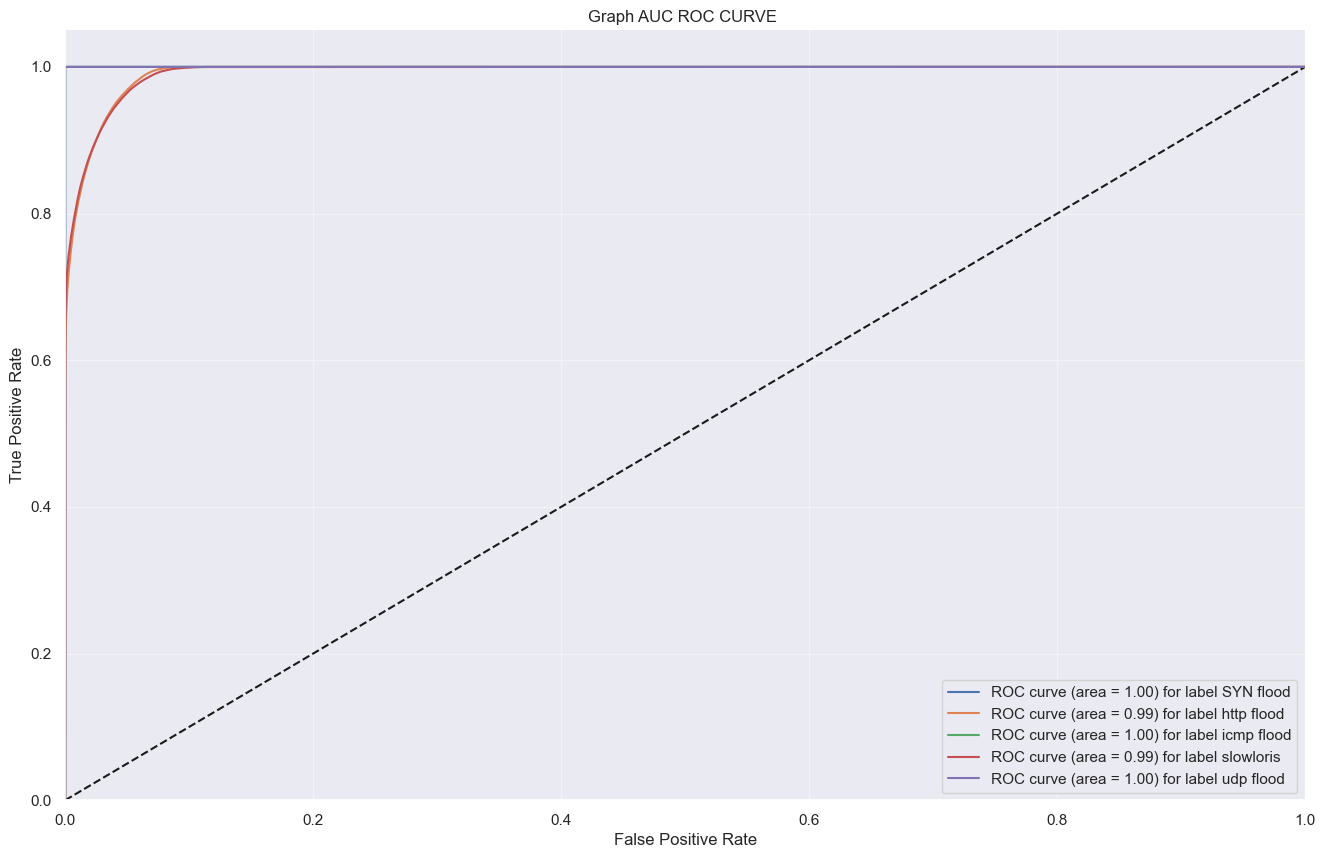

In [38]:
plot_multiclass_roc(model_RF, X_train, y_train, n_classes=5, figsize=(16, 10))

____________Test Random Forest____________
accuracy : 0.9557270360728896
mean absolute error : 0.08855212594520888
mean squared error : 0.17718482707326144
root mean squared error : 0.4209332810235625


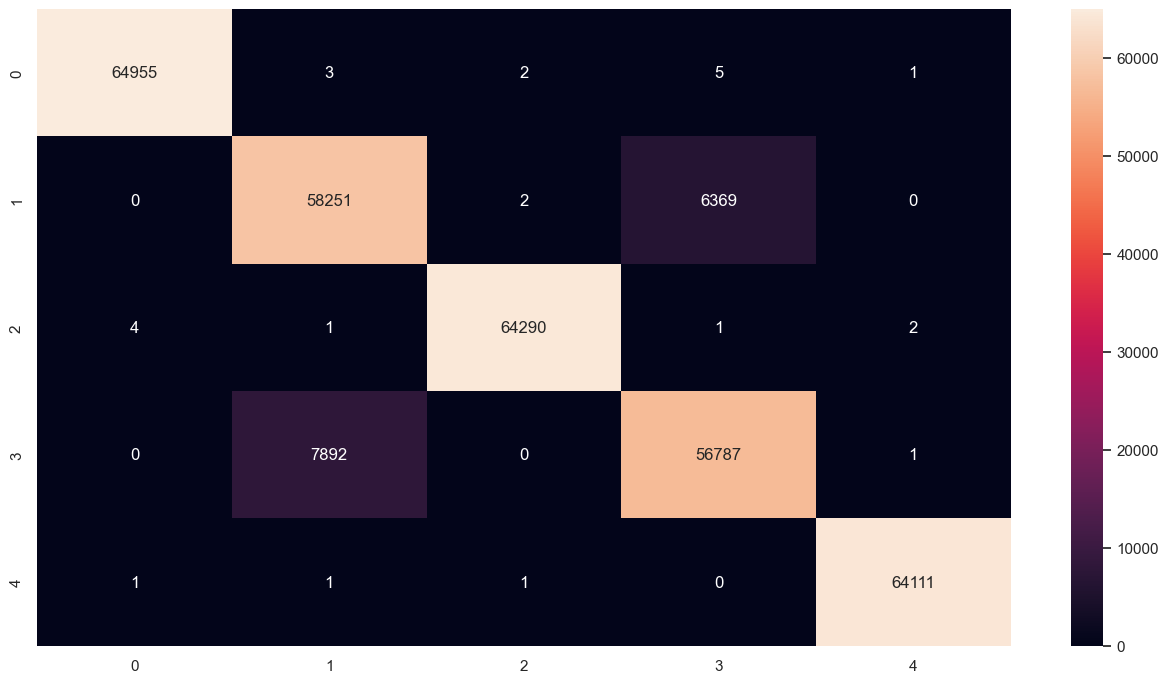

Classification report Test
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00     64966
  http flood       0.88      0.90      0.89     64622
  icmp flood       1.00      1.00      1.00     64298
   slowloris       0.90      0.88      0.89     64680
   udp flood       1.00      1.00      1.00     64114

    accuracy                           0.96    322680
   macro avg       0.96      0.96      0.96    322680
weighted avg       0.96      0.96      0.96    322680



In [39]:
print('____________Test Random Forest____________')
metrics_error(y_test,y_predict_model_RF)
cm = metrics.confusion_matrix(y_test, y_predict_model_RF)
confixion_metrix(y_test, y_predict_model_RF, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_model_RF, target_names=target))

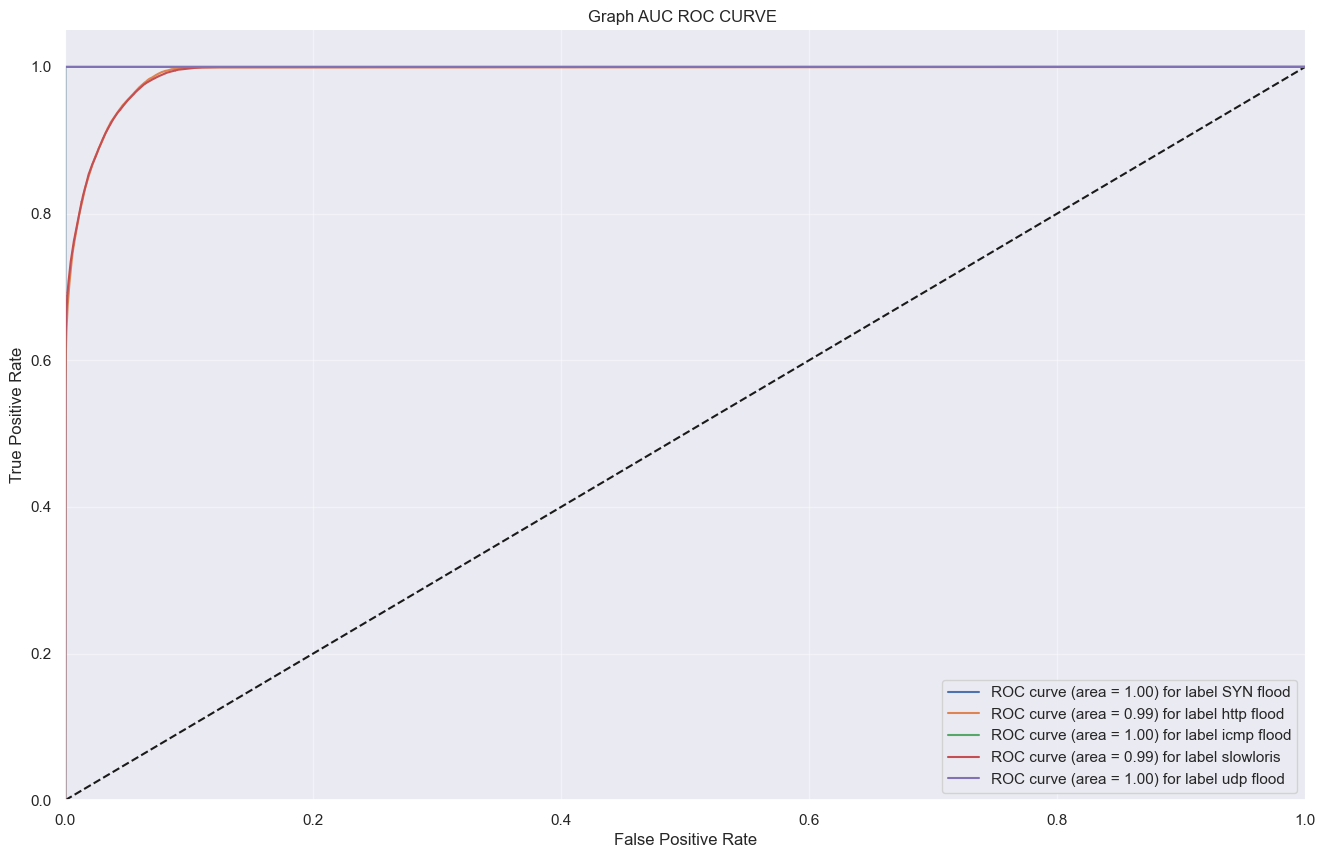

In [40]:
plot_multiclass_roc(model_RF, X_test, y_test, n_classes=5, figsize=(16, 10))

## Naive Baye

____________naive bayes____________
____________Train naive bayes____________
accuracy : 0.8235357010040908
mean absolute error : 0.35296966034461386
mean squared error : 0.7062097124085781
root mean squared error : 0.8403628456854683


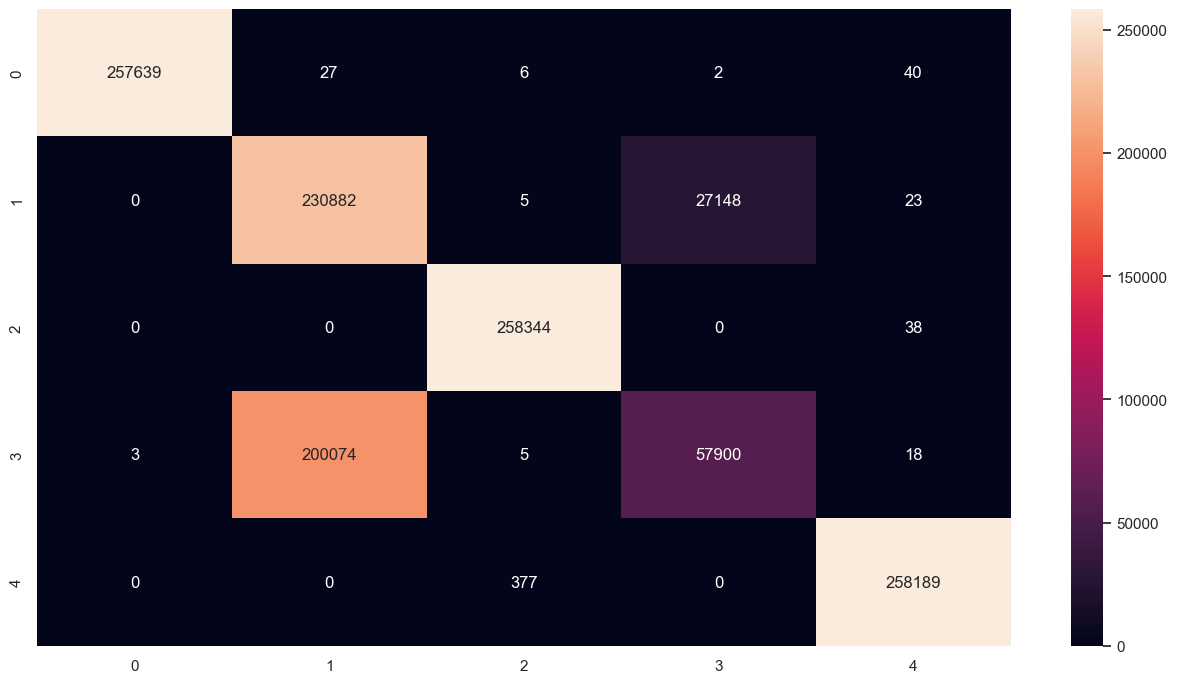

Classification report Training
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00    257714
  http flood       0.54      0.89      0.67    258058
  icmp flood       1.00      1.00      1.00    258382
   slowloris       0.68      0.22      0.34    258000
   udp flood       1.00      1.00      1.00    258566

    accuracy                           0.82   1290720
   macro avg       0.84      0.82      0.80   1290720
weighted avg       0.84      0.82      0.80   1290720



In [41]:
print('____________naive bayes____________')
#Create a Gaussian Classifier
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
y_predict_model_nb=model_nb.predict(X_test)
y_predict_train_model_nb=model_nb.predict(X_train)
print('____________Train naive bayes____________')
metrics_error(y_train,y_predict_train_model_nb)
cm = metrics.confusion_matrix(y_train, y_predict_train_model_nb)
confixion_metrix(y_train, y_predict_train_model_nb, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train_model_nb, target_names=target))

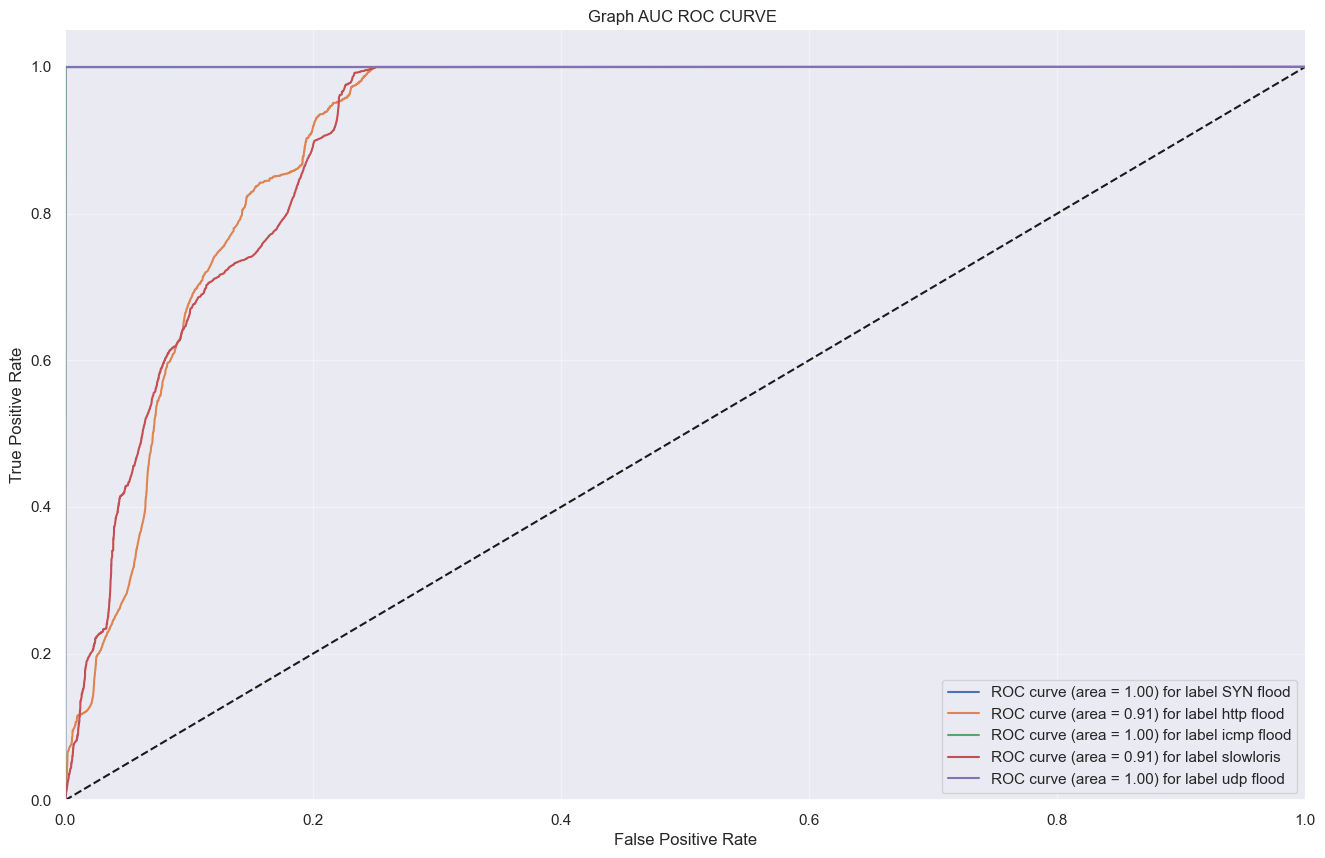

In [42]:
plot_multiclass_roc(model_nb, X_train, y_train, n_classes=5, figsize=(16, 10))

____________Test naive bayes____________
accuracy : 0.8231002851121855
mean absolute error : 0.35385831164001486
mean squared error : 0.7080544192388745
root mean squared error : 0.8414596955522435


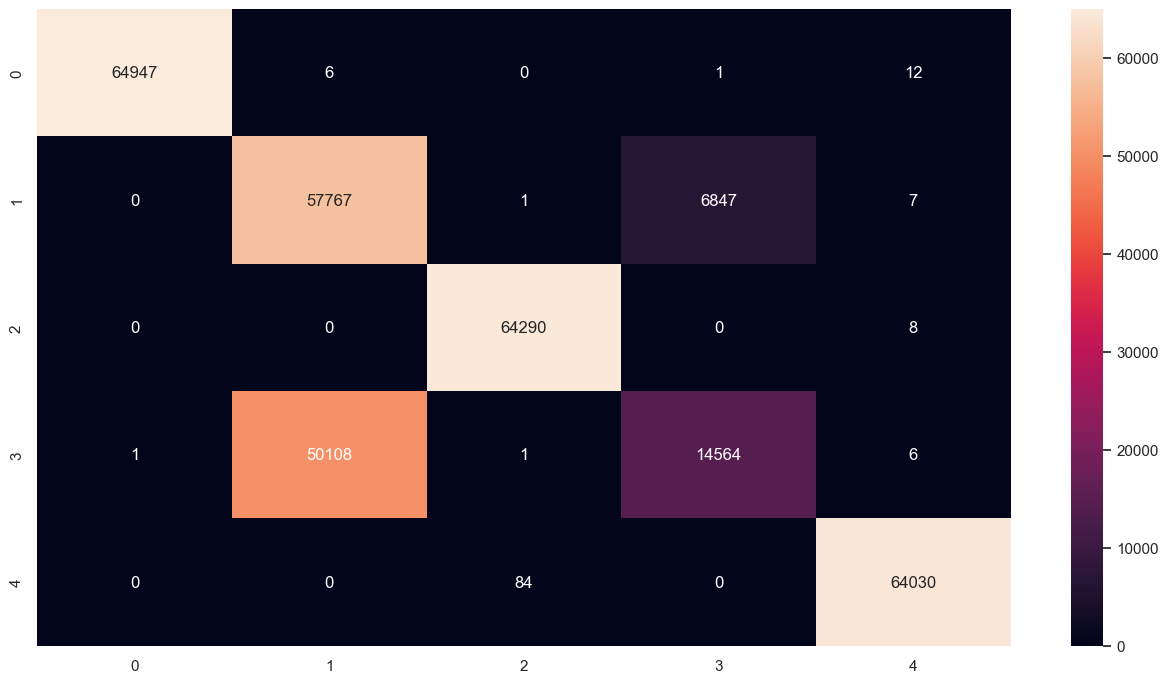

Classification report Test
              precision    recall  f1-score   support

   SYN flood       1.00      1.00      1.00     64966
  http flood       0.54      0.89      0.67     64622
  icmp flood       1.00      1.00      1.00     64298
   slowloris       0.68      0.23      0.34     64680
   udp flood       1.00      1.00      1.00     64114

    accuracy                           0.82    322680
   macro avg       0.84      0.82      0.80    322680
weighted avg       0.84      0.82      0.80    322680



In [43]:
print('____________Test naive bayes____________')
metrics_error(y_test,y_predict_model_nb)
cm = metrics.confusion_matrix(y_test, y_predict_model_nb)
confixion_metrix(y_test, y_predict_model_nb, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_model_nb, target_names=target))

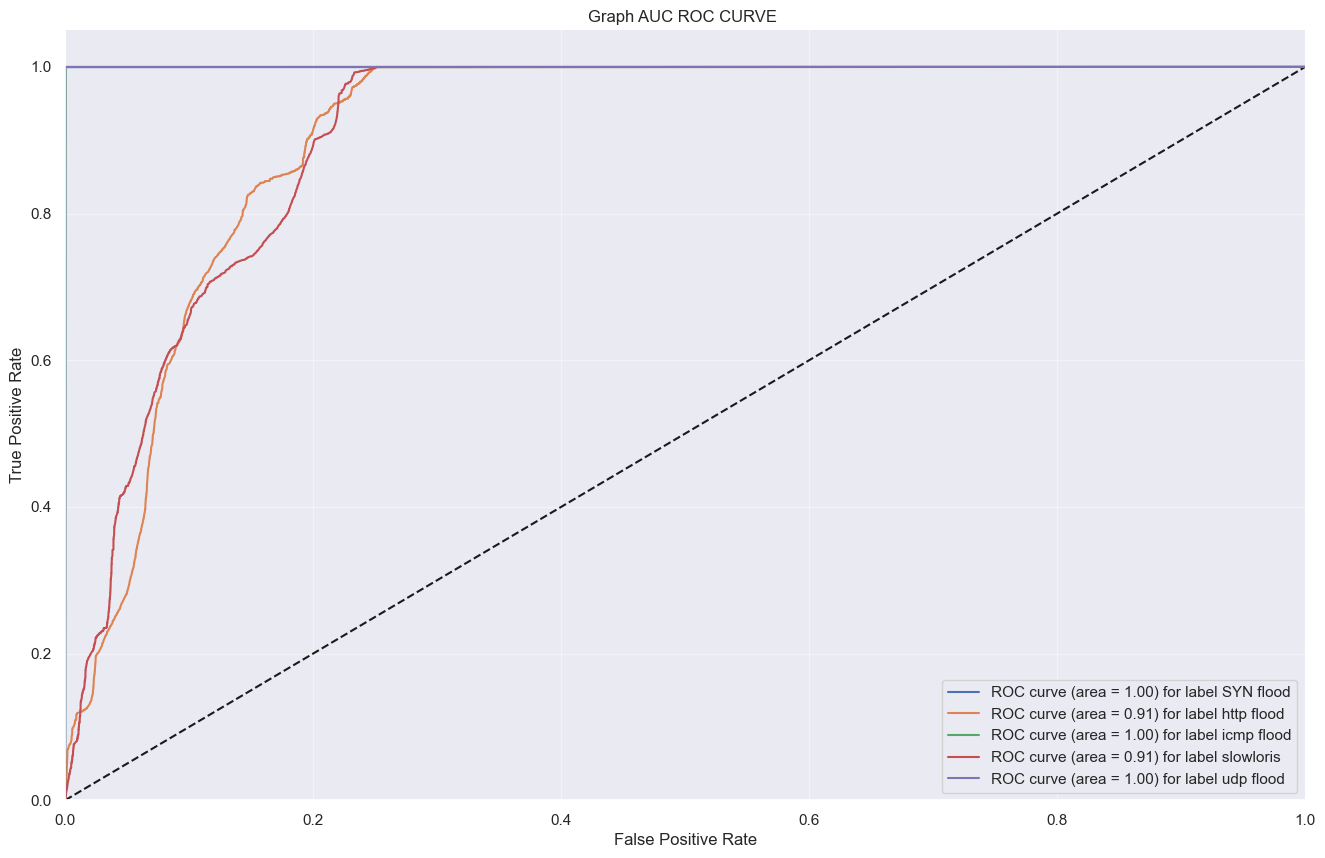

In [44]:
plot_multiclass_roc(model_nb, X_test, y_test, n_classes=5, figsize=(16, 10))

# Models Comparison

In [45]:
# DecisionTree Classifier
AS1=metrics.accuracy_score(y_test,y_predict_Decision_Tree_Classifier)
RMSE1=np.sqrt(metrics.mean_squared_error(y_test,y_predict_Decision_Tree_Classifier))

ASt1=metrics.accuracy_score(y_train,y_predict_train_Decision_Tree_Classifier)
RMSEt1=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train_Decision_Tree_Classifier))

# Logistic Regression
AS2=metrics.accuracy_score(y_test,y_predict)
RMSE2=np.sqrt(metrics.mean_squared_error(y_test,y_predict))

ASt2=metrics.accuracy_score(y_train,y_predict_train)
RMSEt2=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train))

# Random Forest
AS3=metrics.accuracy_score(y_test,y_predict_model_RF)
RMSE3=np.sqrt(metrics.mean_squared_error(y_test,y_predict_model_RF))

ASt3=metrics.accuracy_score(y_train,y_predict_train_model_RF)
RMSEt3=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train_model_RF))

# Naive Baye
AS4=metrics.accuracy_score(y_test,y_predict_model_nb)
RMSE4=np.sqrt(metrics.mean_squared_error(y_test,y_predict_model_nb))

ASt4=metrics.accuracy_score(y_train,y_predict_train_model_nb)
RMSEt4=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train_model_nb))

## Visualisation Perfermance

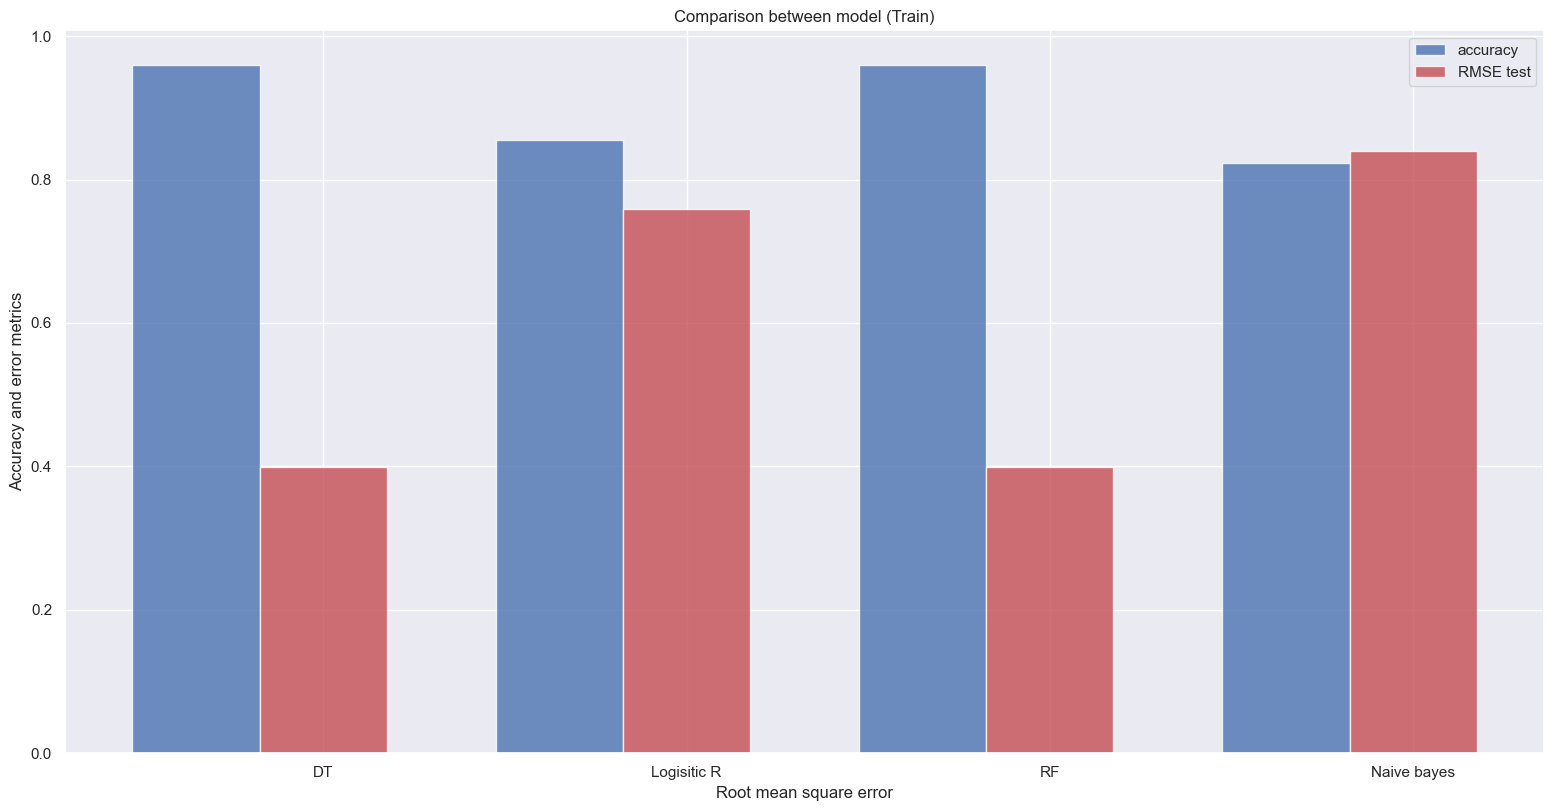

In [46]:
# Data to plot
n_groups = 4
accuracy_score_models_test = (AS1,AS2,AS3,AS4)
error_metric_models_test = (RMSE1,RMSE2,RMSE3,RMSE4)
accuracy_score_models_train = (ASt1,ASt2,ASt3,ASt4)
error_metric_models_train = (RMSEt1,RMSEt2,RMSEt3,RMSEt4)

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, accuracy_score_models_train, bar_width,
alpha=opacity,
color='b',
label='accuracy')

rects2 = plt.bar(index + bar_width, error_metric_models_train, bar_width,
alpha=opacity,
color='r',
label='RMSE test')

plt.xlabel('Root mean square error')
plt.ylabel('Accuracy and error metrics')
plt.title('Comparison between model (Train)')
plt.xticks(index + bar_width, ('DT','Logisitic R','RF', 'Naive bayes'))
plt.legend()

plt.tight_layout()
plt.show()

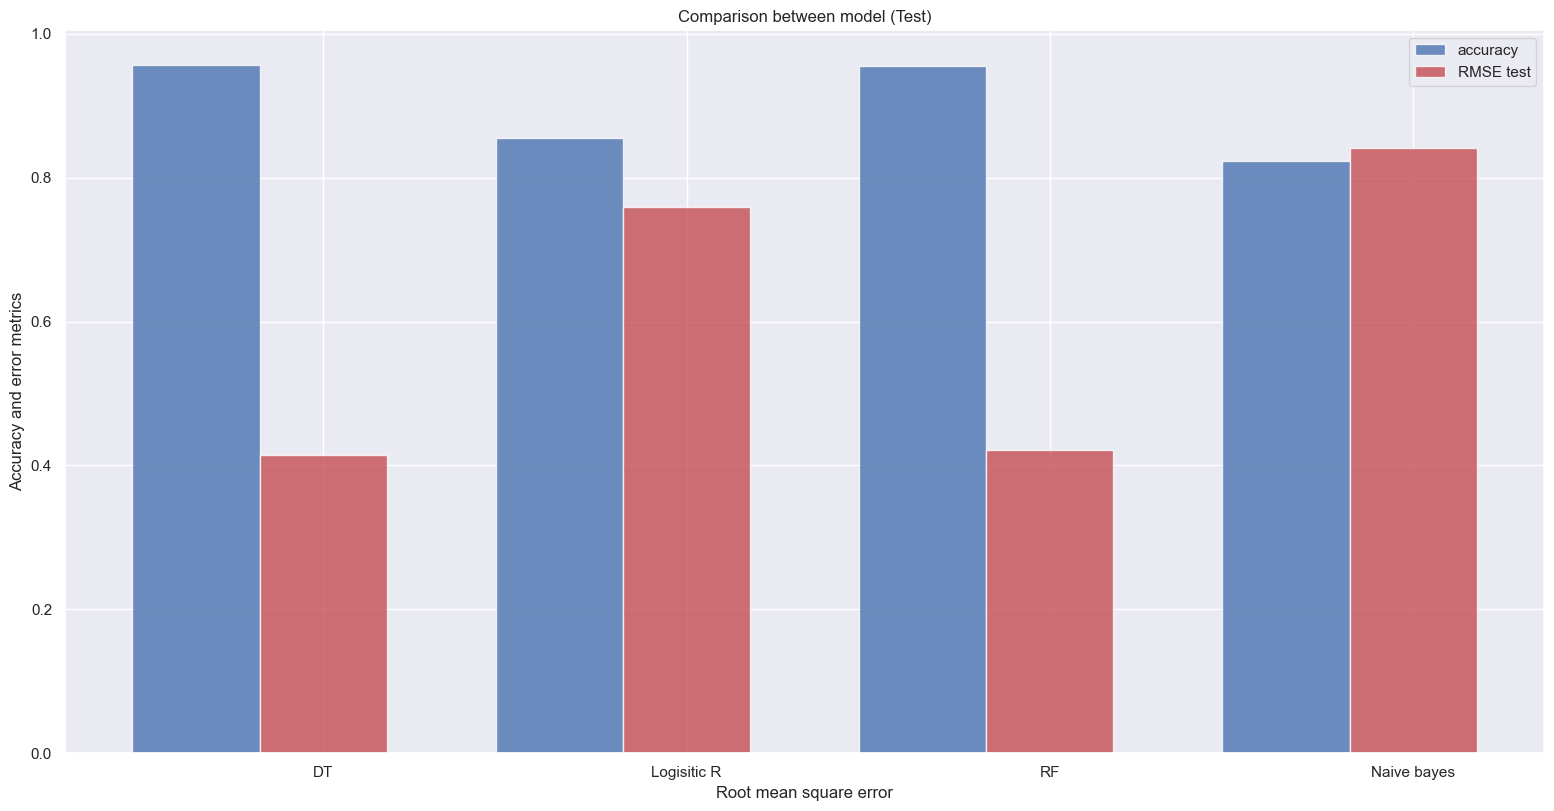

In [47]:
rects1 = plt.bar(index, accuracy_score_models_test, bar_width,
alpha=opacity,
color='b',
label='accuracy')

rects2 = plt.bar(index + bar_width, error_metric_models_test, bar_width,
alpha=opacity,
color='r',
label='RMSE test')

plt.xlabel('Root mean square error')
plt.ylabel('Accuracy and error metrics')
plt.title('Comparison between model (Test)')
plt.xticks(index + bar_width, ('DT','Logisitic R','RF', 'Naive bayes'))
plt.legend()

plt.tight_layout()
plt.show()

We notice that both random forest performed better the the other algorithms.